In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/process_data.csv')
df = df[df['badCd'] == 'C0109']
df = df[df['ptGroupNm'] == 'MAIN']
df.head()

,Bad,badCd,ptGroupNm,qabDscr,Year,Female,Edu,Skill,Hand,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Payment,Height,Weight,DutyHours,OverTimeWork
406,1,C0109,MAIN,인슐레이션형상불량,22.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,3777100.0,150.0,42.0,224.0,0.0
407,0,C0109,MAIN,인슐레이션형상불량,22.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,3777100.0,150.0,42.0,224.0,0.0
408,0,C0109,MAIN,인슐레이션형상불량,33.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,3966000.0,156.0,48.0,216.0,0.0
409,0,C0109,MAIN,인슐레이션형상불량,33.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,3966000.0,156.0,48.0,216.0,0.0
410,0,C0109,MAIN,인슐레이션형상불량,33.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,3966000.0,156.0,48.0,216.0,0.0


In [3]:
del df['badCd']
del df['ptGroupNm']
del df['qabDscr']

data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

## 상관계수 분석 결과

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


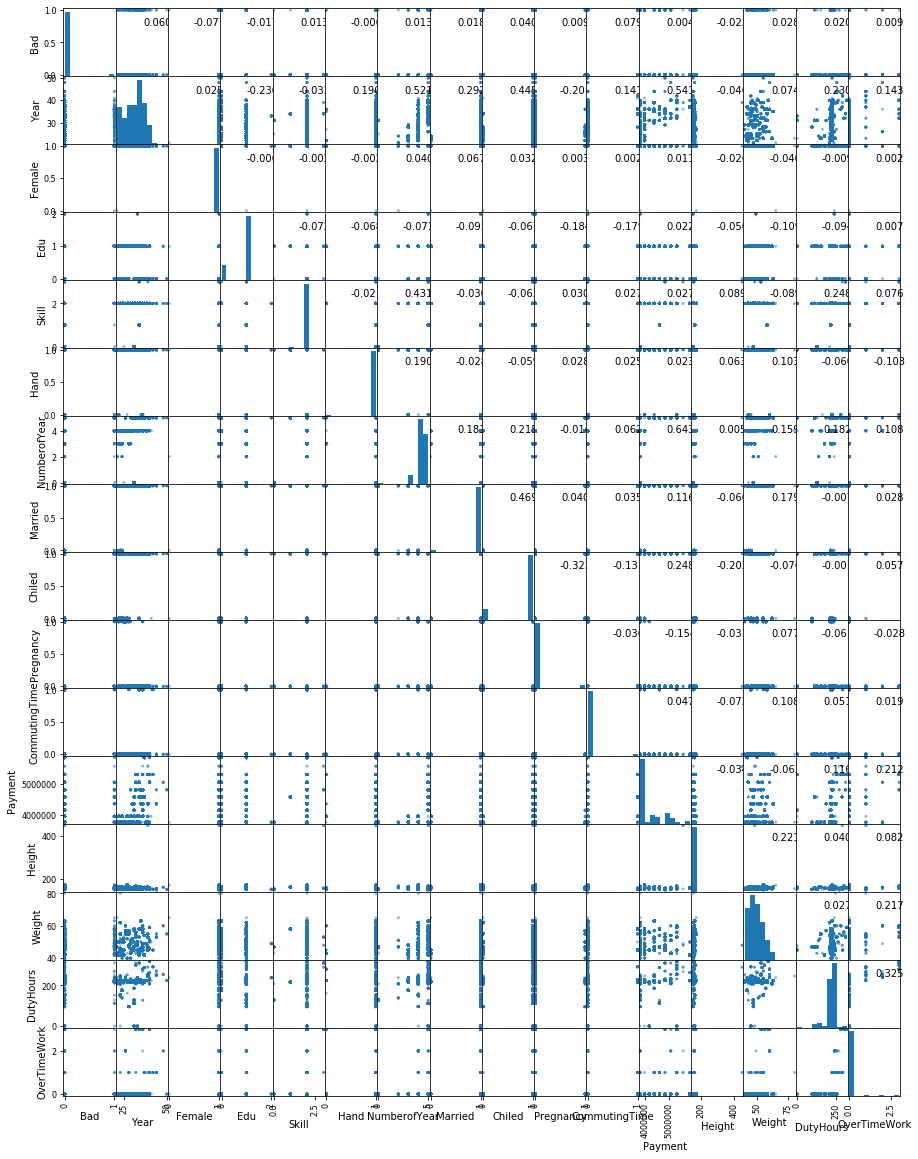

In [4]:
axes = pd.plotting.scatter_matrix(df, figsize = (15,20), alpha = 0.5)
corr = df.corr().as_matrix()
for i,j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.3f" %corr[i,j],(0.8, 0.8), xycoords = 'axes fraction', ha = 'center', va ='center')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## 분석결과 모두 사용하지 않는 경우

In [7]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [8]:
dif = test_y - predict
accuracy1 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy1)

0.46335697399527187


## 로지스틱 회귀분석을 통한 p-Value만 고려하여 사용한 경우

In [9]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [10]:
import statsmodels.api as sm
x = df[['Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.847
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           8.55e-18
Time:                        00:30:42   Log-Likelihood:                 2112.8
No. Observations:                5637   AIC:                            -4194.
Df Residuals:                    5621   BIC:                            -4087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9006      0.184      4.900      0.000       0.540       1.261
Year              0.0025      0.001      3.932      0.000       0.001       0.004
Female           -0.9570      0.168     -5.707      0.000      -1.286      -0.628
Edu               0.0123      0.006      1.993      0.046       0.000       0.024
Skill             0.0285      0.012      2.289      0.022       0.004       0.053
Hand             -0.0161      0.017     -0.927      0.354      -0.050       0.018
NumberofYear     -0.0105      0.006     -1.876      0.061      -0.021       0.000
Married          -0.0263      0.014     -1.853      0.064      -0.054       0.002
Chiled            0.0316      0.009      3.575      0.000       0.014       0.049
Pregnancy         0.0431      0.013      3.209      0.001       0.017       0.069
CommutingTime     0.0805      0.014      5.832      0.000       0.053       0.108
Payment       -5.054e-09   6.84e-09     -0.738      0.460   -1.85e-08    8.36e-09
Height           -0.0003      0.000     -0.812      0.417      -0.001       0.000
Weight            0.0011      0.001      2.273      0.023       0.000       0.002
DutyHours      2.489e-05   7.75e-05      0.321      0.748      -0.000       0.000
OverTimeWork     -0.0049      0.007     -0.667      0.505      -0.019       0.010
==============================================================================
Omnibus:                     5869.889   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           223683.609
Skew:                           5.504   Prob(JB):                         0.00
Kurtosis:                      31.830   Cond. No.                     4.66e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','Female','Edu','Skill','Chiled','Pregnancy','CommutingTime','Weight',


In [12]:
da = df[['Bad','Year','Female','Edu','Skill','Chiled','Pregnancy','CommutingTime','Weight']]
da.head()

,Bad,Year,Female,Edu,Skill,Chiled,Pregnancy,CommutingTime,Weight
406,1,22.0,1.0,1.0,2.0,1.0,0.0,0.0,42.0
407,0,22.0,1.0,1.0,2.0,1.0,0.0,0.0,42.0
408,0,33.0,1.0,0.0,2.0,1.0,0.0,0.0,48.0
409,0,33.0,1.0,0.0,2.0,1.0,0.0,0.0,48.0
410,0,33.0,1.0,0.0,2.0,1.0,0.0,0.0,48.0


In [13]:
data = np.array(da)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [16]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [17]:
dif = test_y - predict
accuracy2 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy2)

0.907210401891253


## RandomForest로 분석한 결과만 활용한 경우

In [18]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [19]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 50)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [23]:
Importance = np.round(rf.feature_importances_,2)
TrainColume = ('Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork')
df_data ={'Imt' : Importance, 'Colume' : TrainColume}
df_data = pd.DataFrame(df_data)

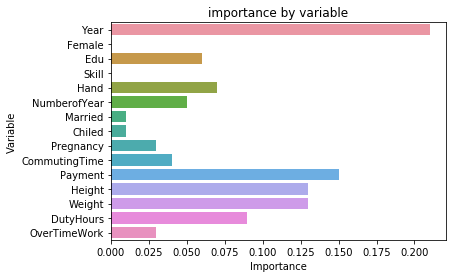

In [24]:
import seaborn as sns
ax = sns.barplot(x=df_data['Imt'], y=df_data['Colume'])
ax.set(xlabel='Importance', ylabel='Variable')
plt.title('importance by variable')
plt.show()

In [25]:
del df['Female']
del df['Skill']

In [26]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [27]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [29]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [30]:
dif = test_y - predict
accuracy3 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy3)

0.4905437352245863


## 두가지 방법으로 분석한 결과를 모두 활용한 경우

In [31]:
df.columns

Index(['Bad', 'Year', 'Edu', 'Hand', 'NumberofYear', 'Married', 'Chiled',
       'Pregnancy', 'CommutingTime', 'Payment', 'Height', 'Weight',
       'DutyHours', 'OverTimeWork'],
      dtype='object')

In [32]:
import statsmodels.api as sm
x = df[['Year', 'Edu', 'Hand', 'NumberofYear', 'Married', 'Chiled',
       'Pregnancy', 'CommutingTime', 'Payment', 'Height', 'Weight',
       'DutyHours', 'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.005
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           3.11e-11
Time:                        00:30:43   Log-Likelihood:                 2093.2
No. Observations:                5637   AIC:                            -4158.
Df Residuals:                    5623   BIC:                            -4066.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0065      0.063     -0.103      0.918      -0.130       0.117
Year              0.0021      0.001      3.426      0.001       0.001       0.003
Edu               0.0108      0.006      1.761      0.078      -0.001       0.023
Hand             -0.0200      0.017     -1.160      0.246      -0.054       0.014
NumberofYear     -0.0036      0.004     -0.836      0.403      -0.012       0.005
Married          -0.0310      0.014     -2.176      0.030      -0.059      -0.003
Chiled            0.0311      0.009      3.524      0.000       0.014       0.048
Pregnancy         0.0410      0.013      3.054      0.002       0.015       0.067
CommutingTime     0.0819      0.014      5.918      0.000       0.055       0.109
Payment        -9.59e-09   6.36e-09     -1.508      0.132   -2.21e-08    2.87e-09
Height           -0.0002      0.000     -0.463      0.643      -0.001       0.001
Weight            0.0009      0.000      1.977      0.048    7.99e-06       0.002
DutyHours      6.725e-05   7.64e-05      0.880      0.379   -8.26e-05       0.000
OverTimeWork     -0.0037      0.007     -0.502      0.616      -0.018       0.011
==============================================================================
Omnibus:                     5861.223   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           221619.100
Skew:                           5.495   Prob(JB):                         0.00
Kurtosis:                      31.685   Cond. No.                     1.20e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','Married','Chiled','Pregnancy','CommutingTime','Weight',


In [34]:
df = df[['Bad','Year','Married','Chiled','Pregnancy','CommutingTime','Weight']]
df.head()

,Bad,Year,Married,Chiled,Pregnancy,CommutingTime,Weight
406,1,22.0,1.0,1.0,0.0,0.0,42.0
407,0,22.0,1.0,1.0,0.0,0.0,42.0
408,0,33.0,1.0,1.0,0.0,0.0,48.0
409,0,33.0,1.0,1.0,0.0,0.0,48.0
410,0,33.0,1.0,1.0,0.0,0.0,48.0


In [35]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [38]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [39]:
# prior가 동일한 경우
dif = test_y - predict
accuracy4 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy4)

0.8729314420803782


## 성능 결과 그래프

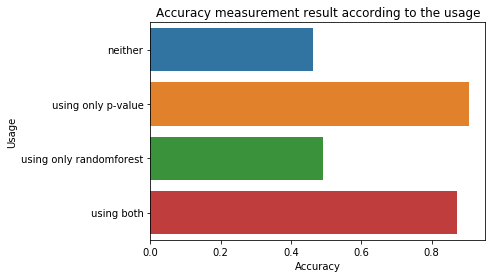

In [40]:
import seaborn as sns
list_ac = [accuracy1,accuracy2,accuracy3,accuracy4]
list_us = ['neither','using only p-value','using only randomforest','using both']
df_data = {'acc' : list_ac, 'use' : list_us}
df_data = pd.DataFrame(df_data)
ax = sns.barplot(x=df_data['acc'], y=df_data['use'])
ax.set(xlabel='Accuracy', ylabel='Usage')
plt.title('Accuracy measurement result according to the usage')
plt.show()